#### DATA WRANGLING AND TIDYING

<br>

# Cleaning US Census Data
<hr>

### 1. Inspect the Data!

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files_states = glob.glob("states*.csv")

df_list = [] #df will be stored here
for file in files_states:
  data = pd.read_csv(file) #this allows every file to be readable
  df_list.append(data)

us_census = pd.concat(df_list) #concats all the dataframes into one
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [22]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [23]:
print(us_census.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


### 2. Regex to the Rescue

Turn the `Income` column into a format that is ready for conversion into a numerical type.

In [24]:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


<br>
Separate the `GenderPop` column into a `Men` column and a `Women` column.

In [25]:
us_census['GenderPop'] = us_census['GenderPop'].str.split('_')
us_census['Men'] = us_census['GenderPop'].str.get(0)
us_census['Women'] = us_census['GenderPop'].str.get(1)

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,"[2341093M, 2489527F]",2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,"[384160M, 349215F]",384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,"[3299088M, 3342840F]",3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,"[1451913M, 1506295F]",1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,"[19087135M, 19334329F]",19087135M,19334329F


Convert both the `Men` and `Women` columns into numerical datatypes.

In [26]:
us_census['Men'] = us_census['Men'].str[:-1]
us_census['Women'] = us_census['Women'].str[:-1]

us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,"[19087135M, 19334329F]",19087135,19334329.0


In [27]:
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


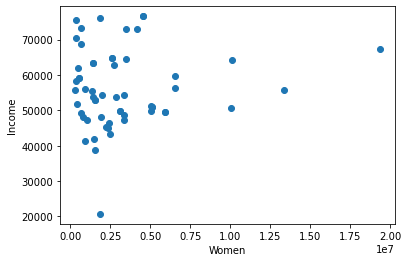

In [28]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

<br>

Check to see the number of women per state.

In [29]:
us_census[['State', 'Women']]

,State,Women
0,Alabama,2489527.0
1,Alaska,349215.0
2,Arizona,3342840.0
3,Arkansas,1506295.0
4,California,19334329.0
5,Colorado,2630239.0
0,Colorado,2630239.0
1,Connecticut,1841615.0
2,Delaware,478041.0
3,District of Columbia,340810.0


Fill in the `NaN`s.

In [30]:
us_census = us_census.fillna(value={'Women': us_census['TotalPop'] - us_census['Men']})
us_census[['State', 'Women']]

,State,Women
0,Alabama,2489527.0
1,Alaska,349215.0
2,Arizona,3342840.0
3,Arkansas,1506295.0
4,California,19334329.0
5,Colorado,2630239.0
0,Colorado,2630239.0
1,Connecticut,1841615.0
2,Delaware,478041.0
3,District of Columbia,340810.0


Check the duplicates!

In [31]:
us_census['State'].duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
Name: State, dtype: bool

Drop the duplicates using `.drop_duplicates()`.

In [32]:
us_census = us_census.drop_duplicates(subset=['State'])

us_census[['State', 'Women']]

,State,Women
0,Alabama,2489527.0
1,Alaska,349215.0
2,Arizona,3342840.0
3,Arkansas,1506295.0
4,California,19334329.0
5,Colorado,2630239.0
1,Connecticut,1841615.0
2,Delaware,478041.0
3,District of Columbia,340810.0
4,Florida,10045763.0


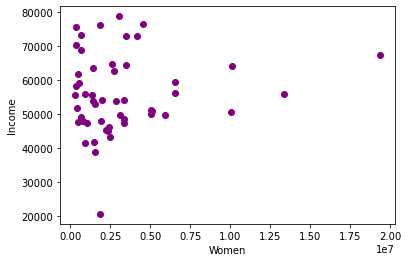

In [35]:
plt.scatter(us_census['Women'], us_census['Income'], color='purple') 
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

### 3. Histogram of Races

In [36]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


Get the columns into a numerical format and remove the '%'.

In [37]:
us_census.Hispanic = us_census.Hispanic.str[:-1]
us_census.White = us_census.White.str[:-1]
us_census.Black = us_census.Black.str[:-1]
us_census.Native = us_census.Native.str[:-1]
us_census.Asian = us_census.Asian.str[:-1]
us_census.Pacific = us_census.Pacific.str[:-1]

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,"[19087135M, 19334329F]",19087135,19334329.0


In [38]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,"[19087135M, 19334329F]",19087135,19334329.0


Fill the `NaN` values to what makes sense, in this case, we will set it to 0.

In [41]:
us_census = us_census.fillna(value={'Hispanic': 0, 'White': 0, 'Black': 0, 'Native': 0, 'Asian': 0, 'Pacific': 0})

us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,"[19087135M, 19334329F]",19087135,19334329.0
5,5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000,64657.801787,"[2648667M, 2630239F]",2648667,2630239.0
1,1,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,"[1751607M, 1841615F]",1751607,1841615.0
2,2,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,0.000000,61827.976636,"[448413M, 478041F]",448413,478041.0
3,3,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,"[306674M, 340810F]",306674,340810.0
4,4,Florida,19645772,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,"[9600009M, 10045763F]",9600009,10045763.0


<br>

Create a histogram for each category of Race.

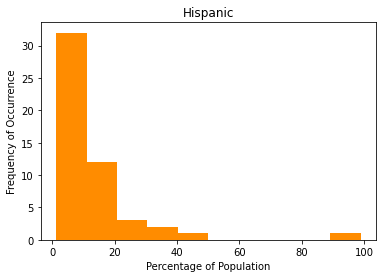

In [46]:
plt.hist(us_census['Hispanic'], color='darkorange')
plt.title('Hispanic')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency of Occurrence')
plt.show()

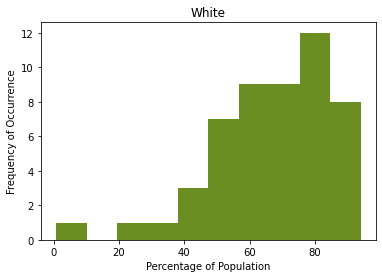

In [47]:
plt.hist(us_census['White'], color='olivedrab')
plt.title('White')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency of Occurrence')
plt.show()

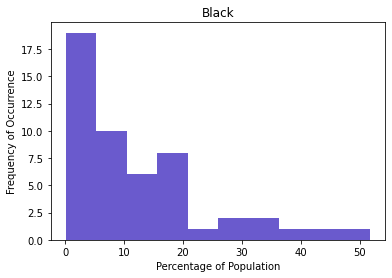

In [48]:
plt.hist(us_census['Black'], color='slateblue')
plt.title('Black')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency of Occurrence')
plt.show()

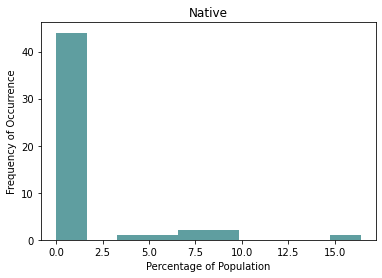

In [49]:
plt.hist(us_census['Native'], color='cadetblue')
plt.title('Native')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency of Occurrence')
plt.show()

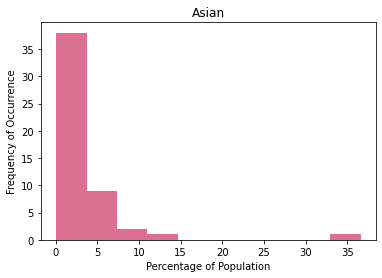

In [50]:
plt.hist(us_census['Asian'], color='palevioletred')
plt.title('Asian')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency of Occurrence')
plt.show()

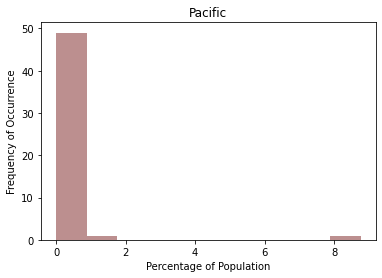

In [51]:
plt.hist(us_census['Pacific'], color='rosybrown')
plt.title('Pacific')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency of Occurrence')
plt.show()